<a href="https://colab.research.google.com/github/hardikkamboj/Google-Earth-Engine-Notebooks/blob/main/USE_CASES/Analyzing_cyclone_winston/Cyclone_Winston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

### INSTALL THE REQUIRED LIBRARIES

In [2]:
!pip install -q tropycal
!pip install -q cartopy

     |████████████████████████████████| 7.2 MB 5.0 MB/s 
     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 23.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 63.6 MB/s 


In [3]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.0
Uninstalling Shapely-1.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos--no-undefined-dcd1b562.so
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-74dec7a7.so.1.14.2
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.0
     |████████████████████████████████| 278 kB 5.0 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import tropycal.tracks as tracks
import datetime as dt

In [5]:
# load the trackDataset Object 
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (40.83 seconds)


# Trajectory of Cyclone Winston

In [6]:
winston = ibtracs.get_storm(('winston',2016))

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4665: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = asanyarray(arr)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4671: ShapelyDeprecationWarning: The array interface is d

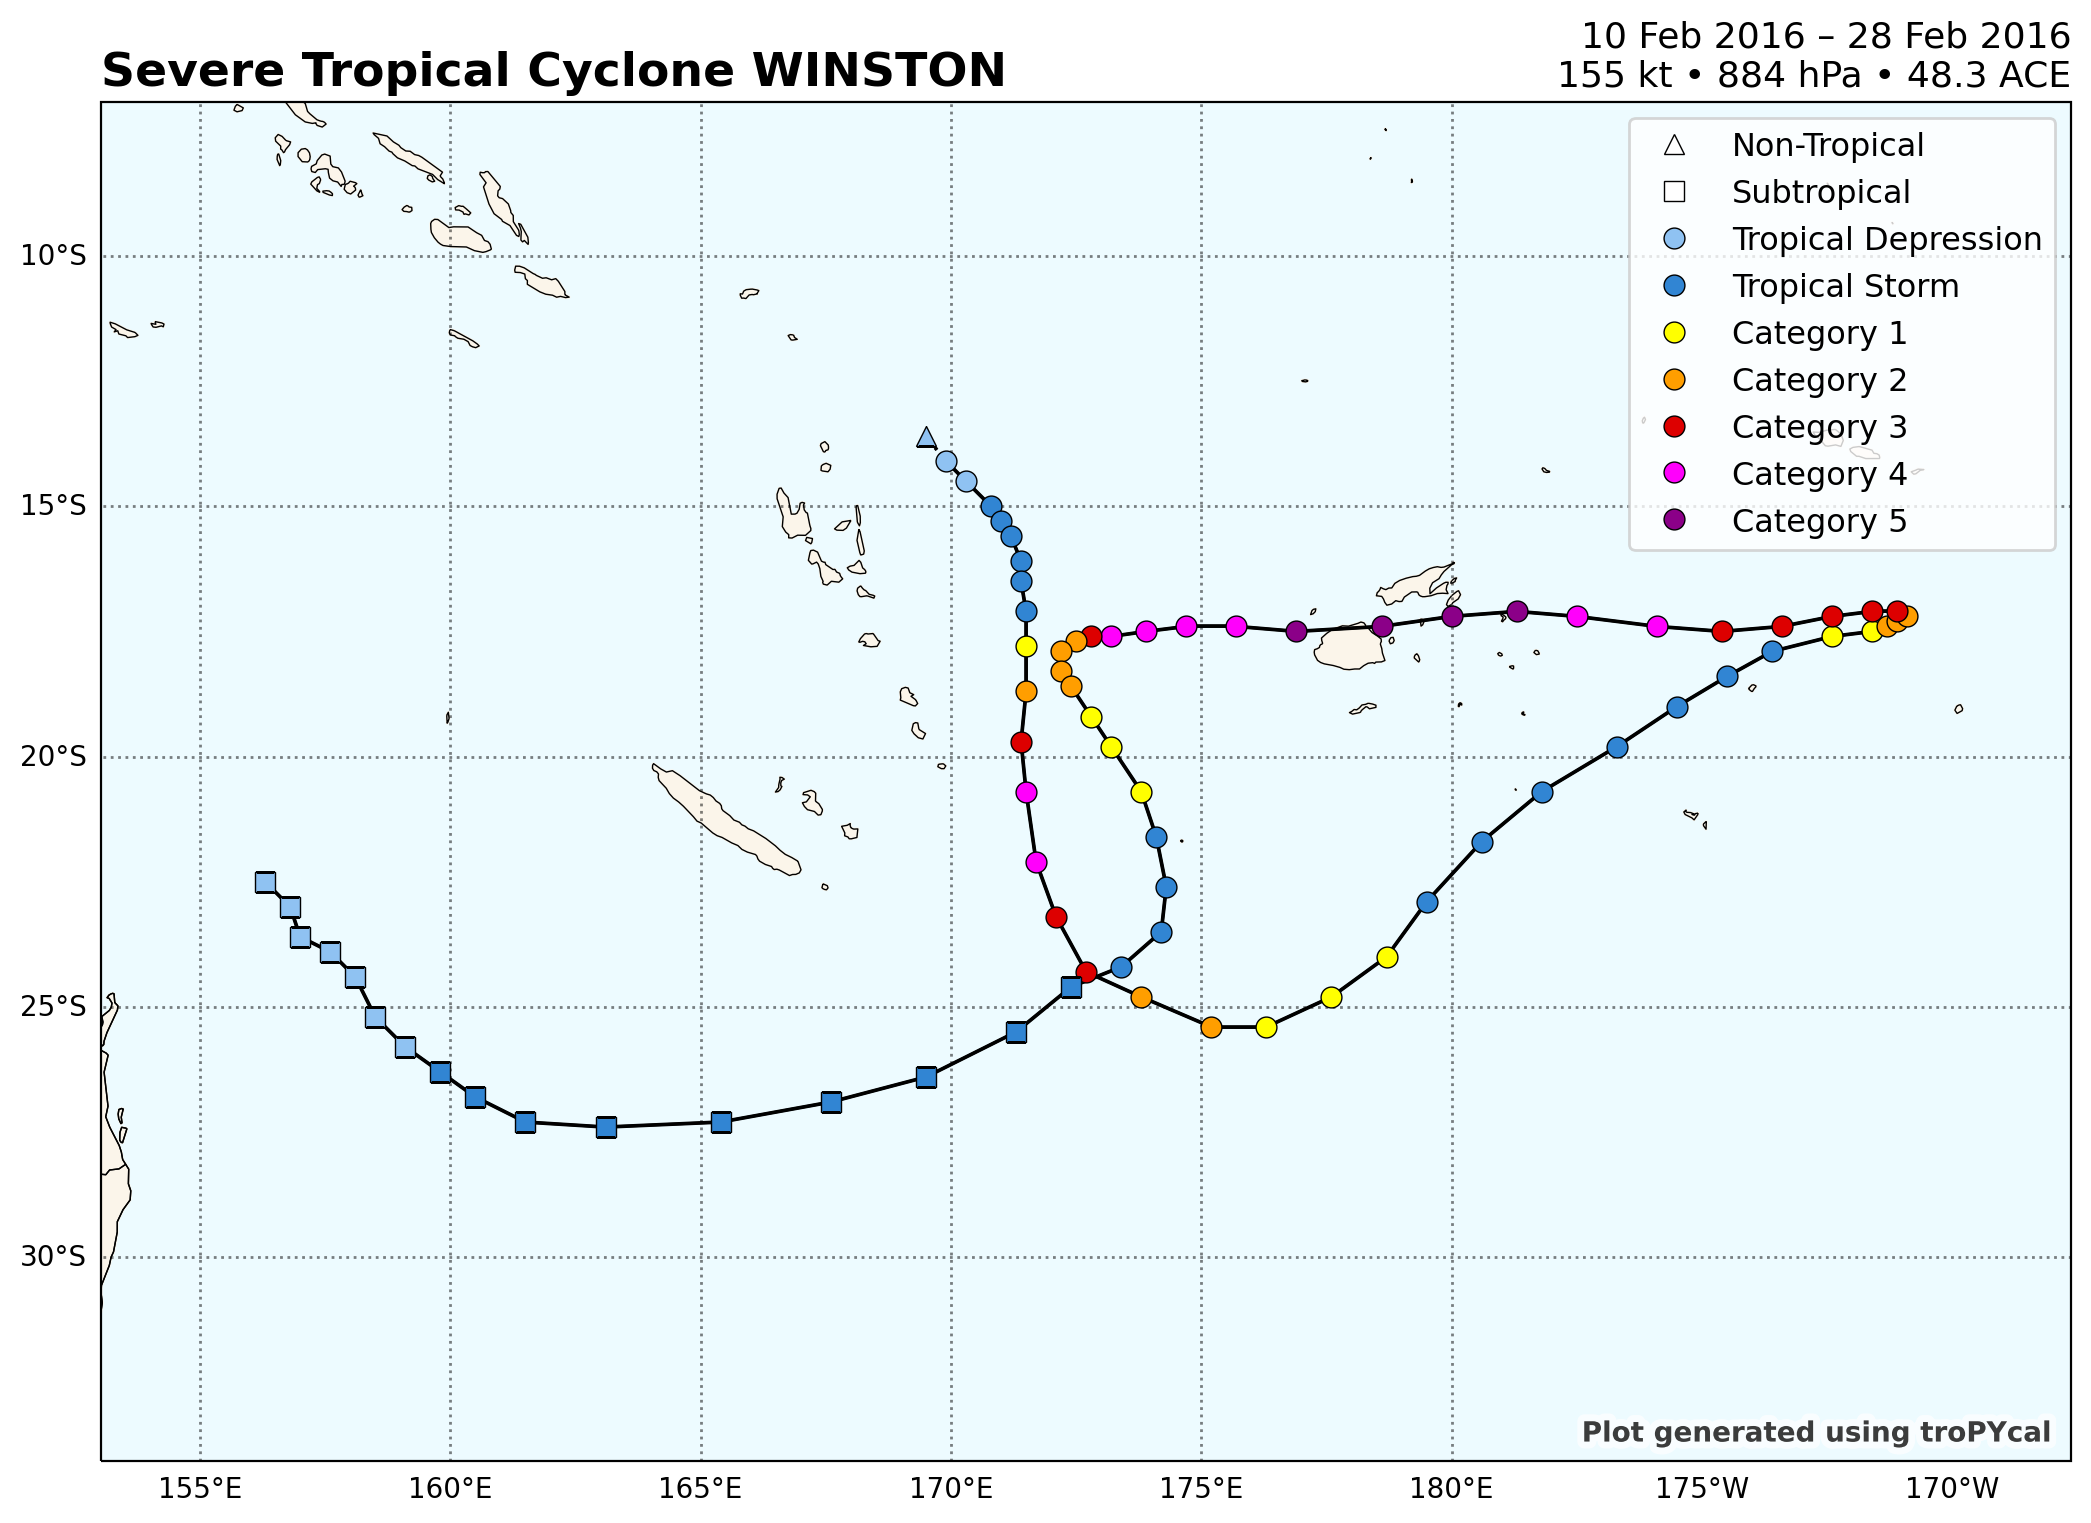

In [7]:
winston.plot()

# Zooming over KORO Island 

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:561: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for inter in intersection:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: 

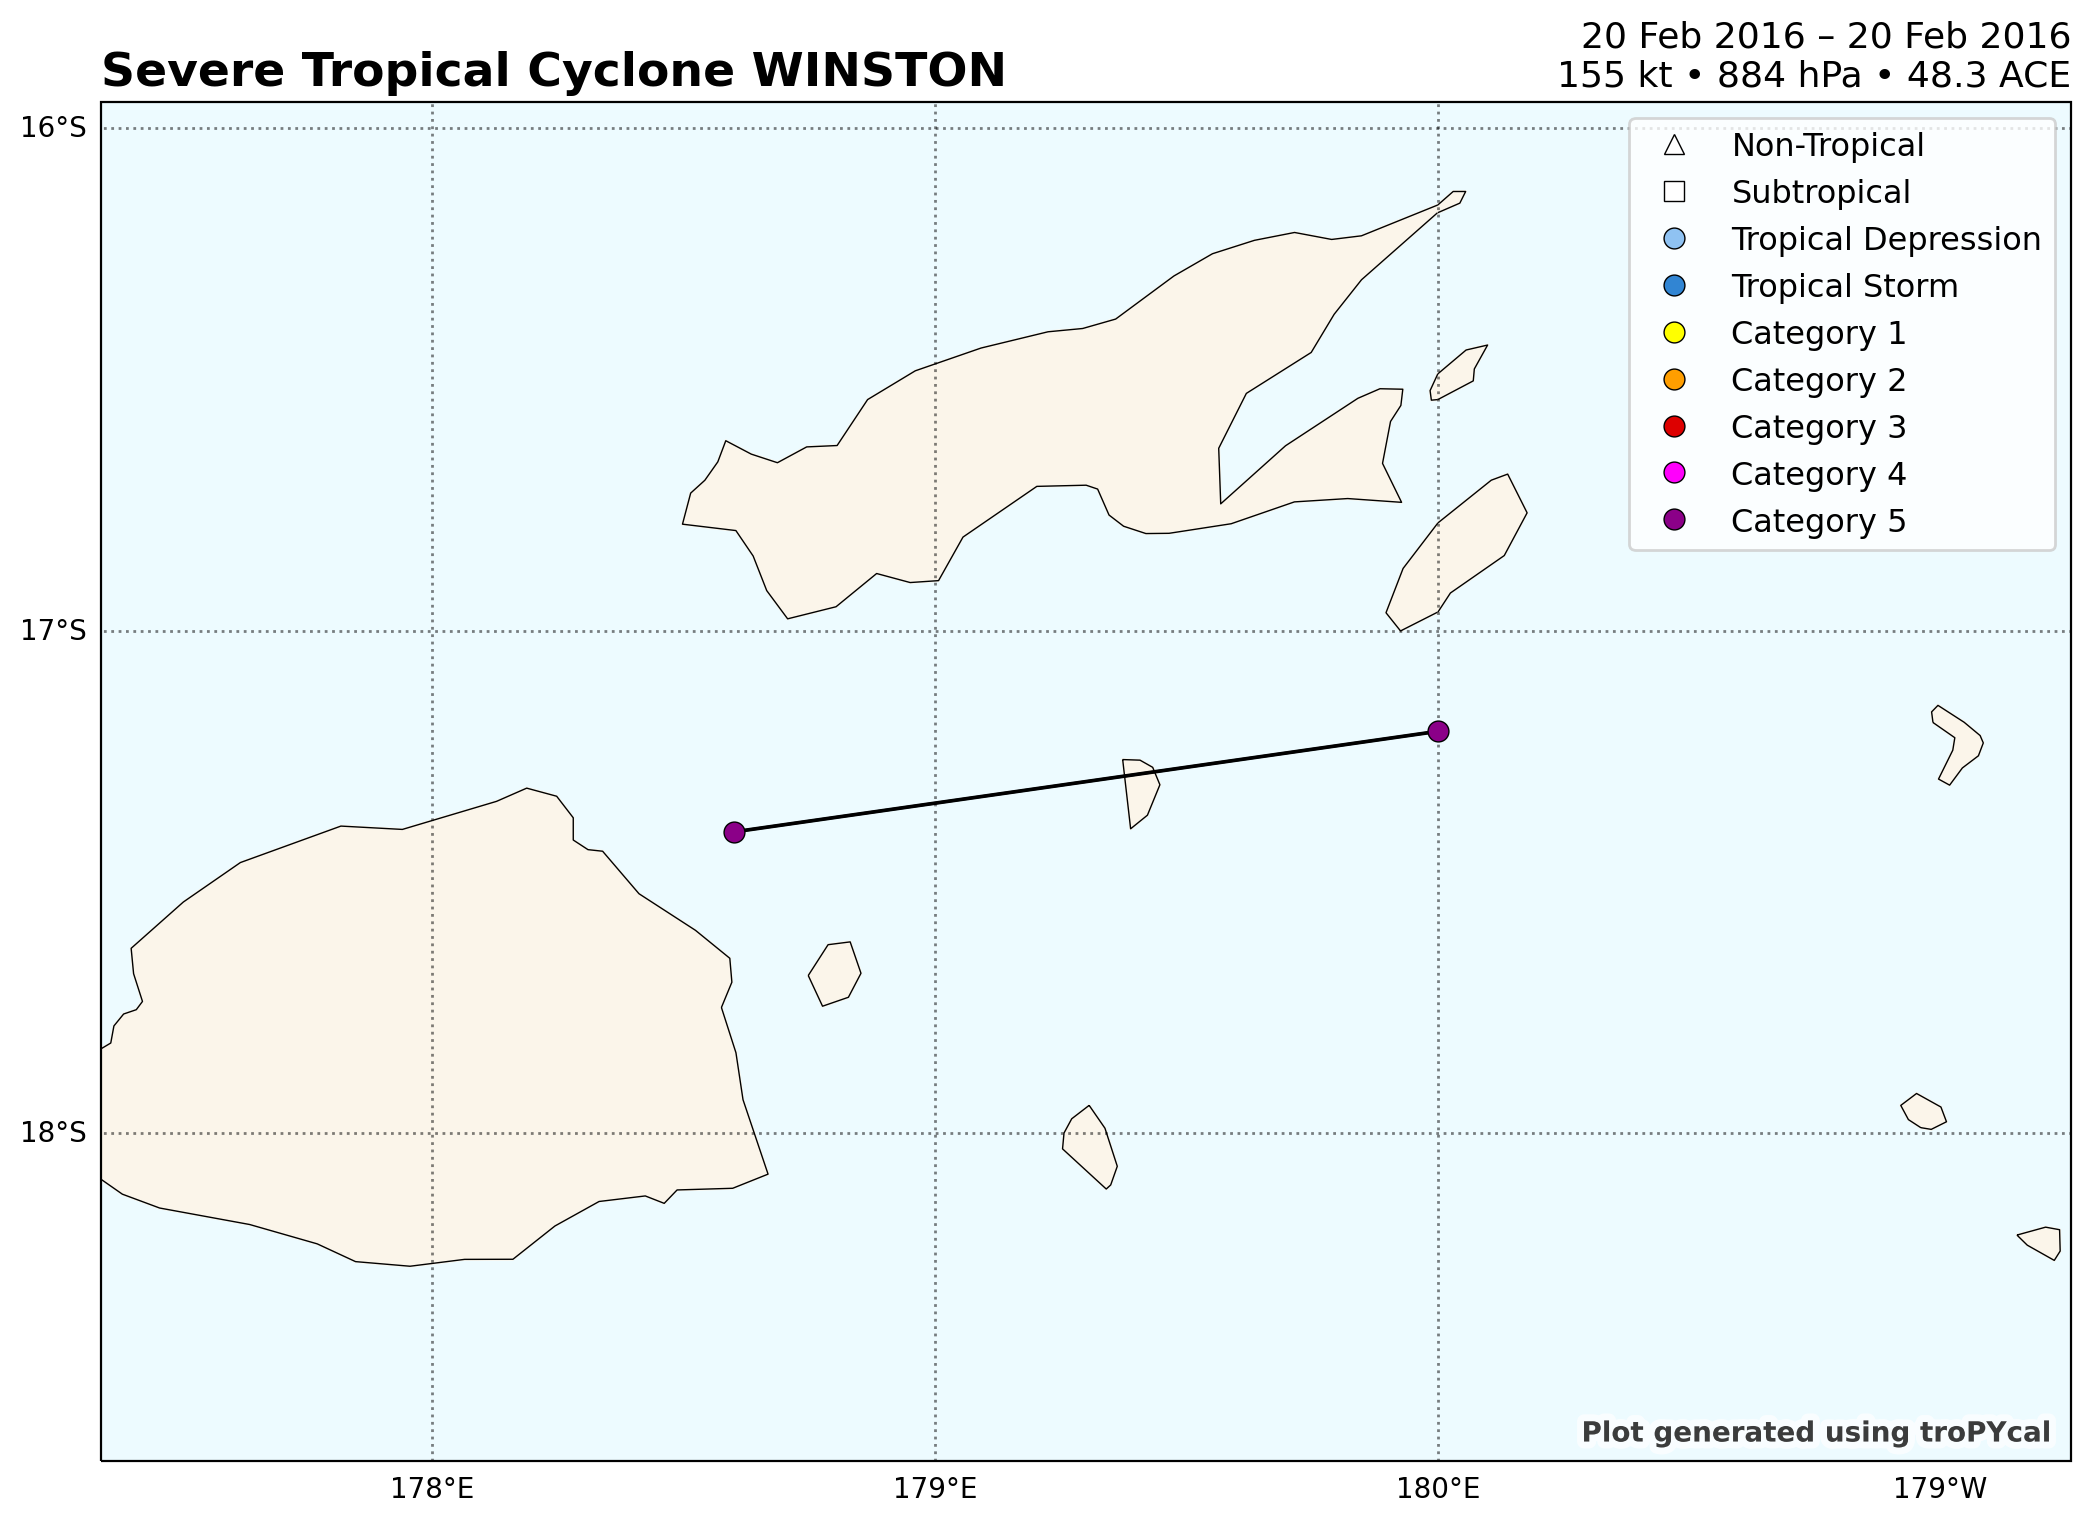

In [8]:
koro_islands = winston.sel(lat=[-18,-17],lon=[178,180])
koro_islands.plot()

## Extract a dataframe for the storm trajectory for the zoomed projection.

In [9]:
df = koro_islands.to_dataframe()

In [10]:
df

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_type,wmo_lat,wmo_lon,wmo_vmax,wmo_mslp,wmo_basin
0,2016-02-20 00:00:00,0,,HU,-17.2,-180.0,150,911,TS,-17.1,179.95,150,884,south_pacific
1,2016-02-20 06:00:00,0,,HU,-17.4,178.6,155,907,TS,-17.4,178.65,150,886,south_pacific


In [11]:
dates = df["date"]
dates

0   2016-02-20 00:00:00
1   2016-02-20 06:00:00
Name: date, dtype: datetime64[ns]

In [12]:
# extracting the dates from the dateframe
date_1 = dates.loc[0]
date_2 = dates.loc[1]

print(date_1)
print(date_2)

2016-02-20 00:00:00
2016-02-20 06:00:00


## Getting images related to the cyclone 

In [13]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=IBQZRt7CXuDNSCa8FjZA-Oi1aZ-y2ubM24N1MDbN60A&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWi3QEarXUQpSdUhYV3f4tquuB9aeGspa8yUViSrBHH0piznh43JJO0

Successfully saved authorization token.


In [14]:
!pip install --quiet wxee

     |████████████████████████████████| 43 kB 750 kB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 26.5 MB 1.4 MB/s 


In [15]:
import wxee
wxee.Initialize()

In [16]:
ndvi_image_collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_8DAY_NDVI")

In [17]:
ndvi_image_collection

In [18]:
week = dt.timedelta(days=7)
one_week_prior = date_1 - week 
one_week_post = date_2 + week

In [19]:
# filtering on the basis of date
filtered_collection = ndvi_image_collection.filterDate(one_week_prior, one_week_post)

In [20]:
# download as image 
# The file name to save
description = "NDVI_images"
# The coordinate reference system to use (NAD83 Albers CONUS)
crs = "EPSG:5070"
# Spatial resolution in CRS units (meters)
scale = 100
# The region to download the image within.
region = ee.Geometry.Polygon(
    [[[179.53077, -17.22298 ],
      [179.26503, -17.22298],
      [179.26503, -17.43011],
      [179.53077, -17.43011, ]]]
)

In [21]:
import os 
os.mkdir("data")

In [22]:

files = filtered_collection.wx.to_tif(
    out_dir="data",
    prefix="wx_",
    region=region,
    scale=scale,
    crs=crs
)

Requesting data:   0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
# download the result 

!zip -r /content/file.zip /content/data

from google.colab import files
files.download("/content/file.zip")

  adding: content/data/ (stored 0%)
  adding: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160226.time.20160226T000000.tif (deflated 3%)
  adding: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>